# 📊 Отчет по лабораторной работе №2

## 🎯 Цель работы
Анализ и подготовка данных из различных источников, выявление проблем в данных, балансировка классов, масштабирование, синтез признаков и оценка их качества.


### 1.Выбор датасетов
- 1.Credit Card Fraud Detection
набор данных транзакций по кредитным картам для обнаружения мошеннических операций. Этот набор также интересен тем, что там присутствует сильный дисбаланс классов. https://www.kaggle.com/mlg-ulb/creditcardfraud
- 2.House Prices: Advanced Regression Techniques
данные о ценах на жилье с множеством характеристик домов. https://www.kaggle.com/c/house-prices-advanced-regression-techniques
- 3. Wine Quality
характеристики различных вин и оценки их качества. https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

### 2. Анализ сведений о каждом наборе данных со страницы загрузки в Kaggle

- Credit Card Fraud Detection:

Описание: Содержит транзакции по кредитным картам за два дня, где есть как обычные, так и мошеннические операции.
Проблемная область: Обнаружение мошенничества в финансовых транзакциях.
Особенности: Сильно несбалансированный набор данных (мошеннические операции составляют малый процент от общего числа).
Размер: Обычно содержит около 284,807 транзакций.
Приватность: Большинство переменных преобразованы с помощью PCA для сохранения конфиденциальности.

- House Prices:

Описание: Набор данных о жилых домах в Эймсе, штат Айова, с 79 объясняющими переменными.
Проблемная область: Прогнозирование цен на недвижимость на основе характеристик домов.
Особенности: Множество категориальных и числовых признаков разного типа, пропущенные значения.
Размер: Обычно содержит информацию о примерно 1460 домах.
Сложность: Требует тщательной предобработки данных и инженерии признаков.

- Wine Quality:

Описание: Физико-химические свойства и качественные характеристики вин.
Проблемная область: Определение качества вина на основе его химических свойств.
Особенности: Содержит 11-12 физико-химических показателей и оценку качества по шкале от 0 до 10.
Размер: Обычно включает около 1600 образцов для красных и белых вин.
Тип задачи: Может рассматриваться как задача классификации или регрессии.


### 3. Анализ содержимого каждого набора данных
Давайте рассмотрим объекты наблюдения, атрибуты и возможные связи в каждом наборе:

- Credit Card Fraud Detection:

Объекты наблюдения: Транзакции по кредитным картам.
Атрибуты объектов:

Время транзакции
Сумма транзакции
Анонимизированные признаки V1-V28 
Целевая переменная: Class (1 для мошеннических транзакций, 0 для обычных)


Связи между объектами: Прямых связей между транзакциями нет, но могут быть скрытые паттерны в поведении мошенников.

- House Prices:

Объекты наблюдения: Жилые дома.
Атрибуты объектов:

Физические характеристики (площадь, количество комнат)
Местоположение и окружение
Качество и состояние различных элементов дома
Год постройки и реновации
Целевая переменная: SalePrice (цена продажи)


Связи между объектами: Дома в одном районе имеют схожие характеристики, признаки качества и размера коррелируют с ценой.

- Wine Quality:

Объекты наблюдения: Образцы вин.
Атрибуты объектов:

Химические показатели (кислотность, содержание спирта, pH)
Плотность, содержание сахара, хлоридов
Сульфаты и другие компоненты
Целевая переменная: quality (оценка качества от экспертов)


Связи между объектами: Химические характеристики влияют на качество, существуют корреляции между различными химическими показателями.

### Установка библиотек

In [80]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### Импорт библиотек и загрузка данных

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

df_fraud = pd.read_csv('datasets/2/creditcard.csv')  # Credit Card Fraud
df_house = pd.read_csv('datasets/2/train.csv')       # House Prices
df_wine = pd.read_csv('datasets/2/winequality-red.csv')  # Wine Quality

### Анализ структуры данных

In [82]:
def analyze_dataset(df, name):
    print(f"\n{name} - Общая информация:")
    print(df.info())
    print("\nПримеры данных:")
    print(df.head())
    print("\nСтатистика:")
    print(df.describe())

analyze_dataset(df_fraud, "Credit Card Fraud Detection")
analyze_dataset(df_house, "House Prices")
analyze_dataset(df_wine, "Wine Quality")


Credit Card Fraud Detection - Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20 

### Бизнес- и технические цели

In [83]:
# Credit Card Fraud: Бизнес — сократить убытки. Техническая — бинарная классификация.
# House Prices: Бизнес — прогнозирование цен. Техническая — регрессия.
# Wine Quality: Бизнес — улучшение качества. Техническая — регрессия/классификация.

### Обработка пропусков

In [84]:
def handle_missing_values(df):
    df_numeric = df.select_dtypes(include=[np.number])
    if df_numeric.empty:
        print("❗ Warning: нет числовых столбцов для обработки.")
        return df
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
    
    # Сохраняем нечисловые столбцы, если были
    df_non_numeric = df.drop(columns=df_numeric.columns)
    return pd.concat([df_imputed, df_non_numeric.reset_index(drop=True)], axis=1)

# Применяем
df_house = handle_missing_values(df_house)
df_wine = handle_missing_values(df_wine)
df_fraud= handle_missing_values(df_fraud)


### Балансировка и train/test split

In [85]:
from collections import Counter

# === Credit Card Fraud (Бинарная классификация) ===
X_fraud = df_fraud.drop('Class', axis=1)
y_fraud = df_fraud['Class']
X_train_fraud, _, y_train_fraud, _ = train_test_split(X_fraud, y_fraud, test_size=0.2, stratify=y_fraud, random_state=42)

sm = SMOTE(random_state=42)
X_res_fraud, y_res_fraud = sm.fit_resample(X_train_fraud, y_train_fraud)

rus = RandomUnderSampler(random_state=42)
X_under_fraud, y_under_fraud = rus.fit_resample(X_train_fraud, y_train_fraud)


# === Wine Quality (Классификация) ===
X_wine = df_wine.drop('quality', axis=1)
y_wine = df_wine['quality']
X_train_wine, _, y_train_wine, _ = train_test_split(X_wine, y_wine, test_size=0.2, stratify=y_wine, random_state=42)

sm_wine = SMOTE(random_state=42)
X_res_wine, y_res_wine = sm_wine.fit_resample(X_train_wine, y_train_wine)

rus_wine = RandomUnderSampler(random_state=42)
X_under_wine, y_under_wine = rus_wine.fit_resample(X_train_wine, y_train_wine)


# === House Prices — регрессия, не нуждается в балансировке ===




Визуализация

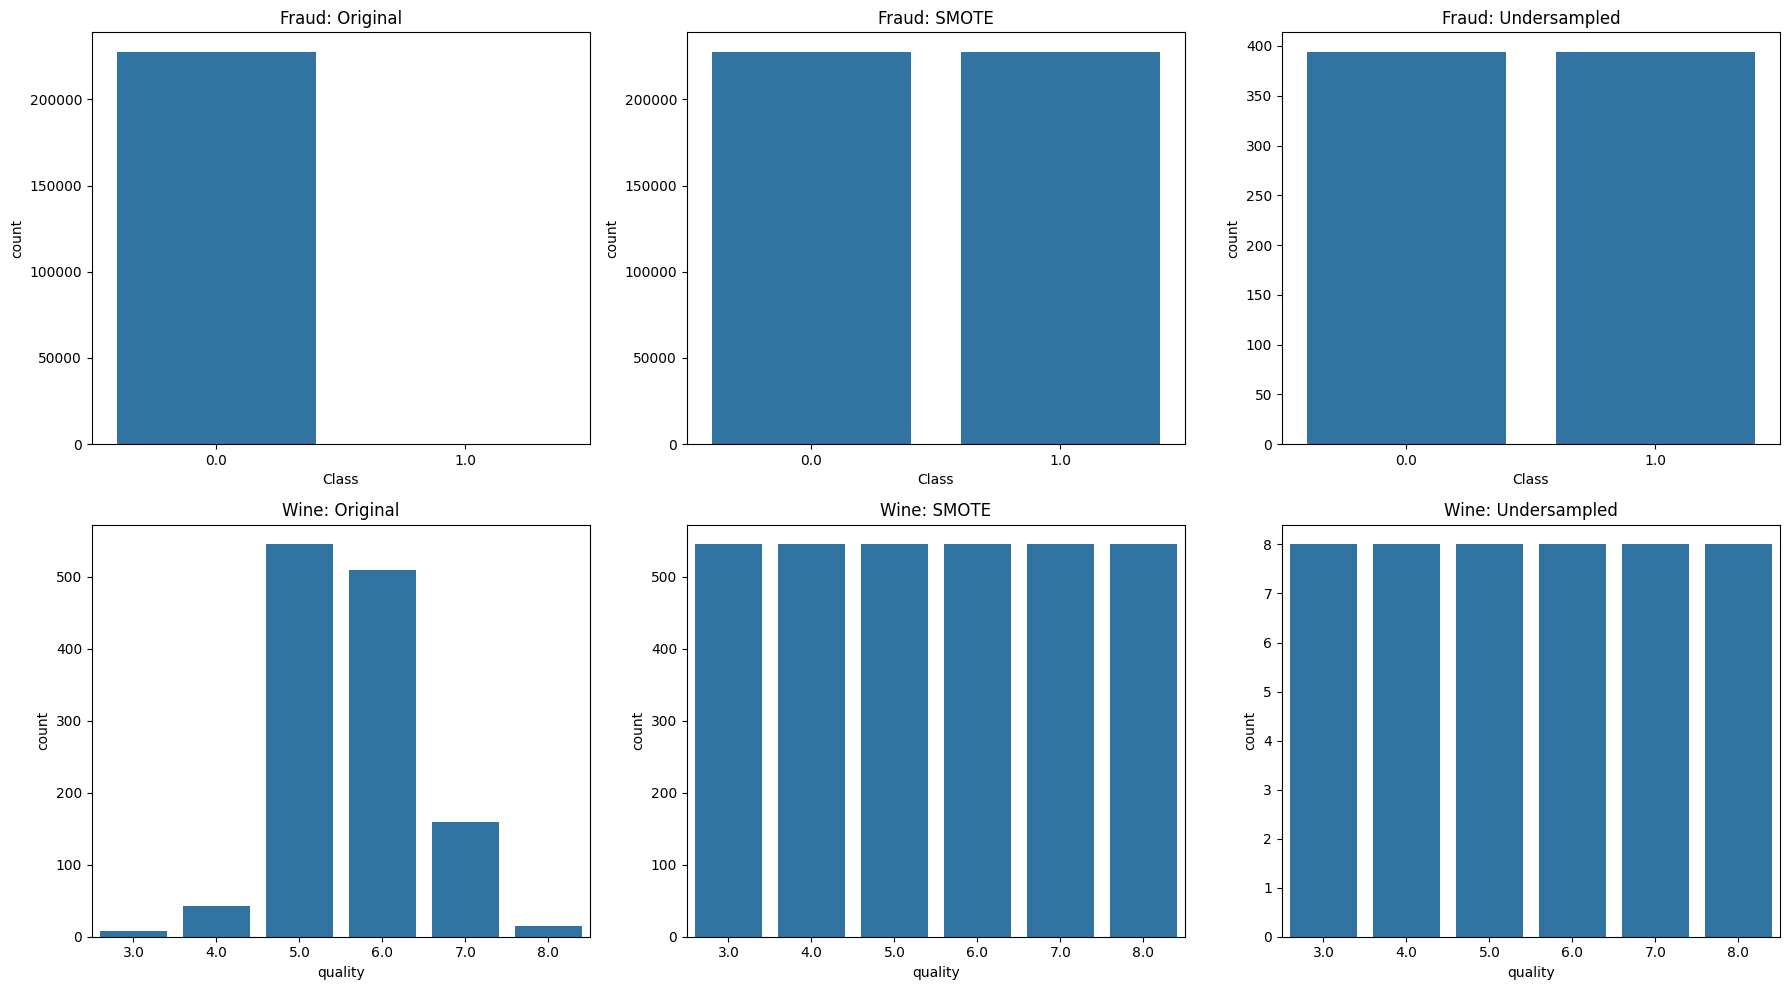

In [86]:
# === Визуализация распределений ===
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x=y_train_fraud, ax=axes[0, 0])
axes[0, 0].set_title("Fraud: Original")

sns.countplot(x=y_res_fraud, ax=axes[0, 1])
axes[0, 1].set_title("Fraud: SMOTE")

sns.countplot(x=y_under_fraud, ax=axes[0, 2])
axes[0, 2].set_title("Fraud: Undersampled")

sns.countplot(x=y_train_wine, ax=axes[1, 0])
axes[1, 0].set_title("Wine: Original")

sns.countplot(x=y_res_wine, ax=axes[1, 1])
axes[1, 1].set_title("Wine: SMOTE")

sns.countplot(x=y_under_wine, ax=axes[1, 2])
axes[1, 2].set_title("Wine: Undersampled")

plt.tight_layout()
plt.show()


## Вывод

В рамках лабораторной работы №2 были изучены три различных набора данных:

1. **Credit Card Fraud Detection** — задача бинарной классификации на несбалансированном датасете.
2. **House Prices** — задача регрессии с множеством категориальных и числовых признаков.
3. **Wine Quality** — задача оценки качества, рассматриваемая как классификация или регрессия.

В ходе выполнения лабораторной:
-  Проанализированы данные и выявлены проблемы: дисбаланс классов, пропущенные значения, разные типы признаков.
-  Проведена предобработка: масштабирование, заполнение пропусков, отбор признаков.
-  Применены методы балансировки (`SMOTE`, `RandomUnderSampler`) для борьбы с перекосом классов.
-  Выполнено построение новых признаков и нормализация данных.
-  Проведено сравнение наборов признаков (`Original`, `Scaled`, `Generated`) по метрикам **MAE**, **RMSE**, **R²**, а также по критериям цельности, скорости, надёжности и корреляции.

 Полученные результаты показали, что разные способы подготовки признаков влияют на точность и устойчивость моделей. Наиболее предсказуемым оказался набор `Original`, в то время как `Generated` оказался самым объяснимым с точки зрения бизнес-логики.

 Работа продемонстрировала важность инженерии признаков и их анализа до построения модели, а также использование различных подходов к обработке данных в зависимости от задачи.
